In [1]:
from trainVAE import *

In [2]:
data_path='../5-Results/bengal/0812/'

In [70]:
vae = TrainVAE(10, data_path, 'lat_10')
model = vae.vae
model.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 128, 64, 1)]      0         
_________________________________________________________________
encoder (Model)              [(None, 10), (None, 10),  361396    
_________________________________________________________________
decoder (Model)              (None, 128, 64, 1)        359809    
Total params: 721,205
Trainable params: 721,205
Non-trainable params: 0
_________________________________________________________________


In [5]:
org_path = '../5-Results/bengal/0812/pre/'

In [6]:
data = np.load(org_path+'data.npy')

In [7]:
sylla = np.load(org_path+'sylla_list.npy')

In [11]:
wav = np.load(org_path+'wav_list.npy')

In [71]:
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=vae.encoder, decoder=vae.decoder, vae=vae.vae)

In [72]:
checkpoint.restore(tf.train.latest_checkpoint(vae.ckp_dir))

In [42]:
out = vae.encoder.predict(data[:10000])[2]

In [73]:
out10 = vae.encoder.predict(data[:10000])[2]

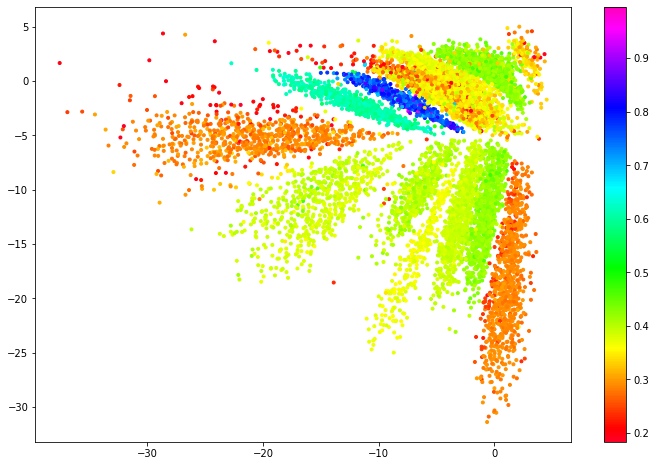

In [80]:
n = 100
colors = lenth[:10000]
colors = colors/6000

fig = plt.figure(figsize=(12,8))
c = plt.scatter(out[:,0], out[:,1], c=colors,cmap='gist_rainbow', marker='.')
plt.colorbar(c)

In [92]:
sylla

array([[     0,   8906,   2280],
       [     0,  11703,   2159],
       [     0,  14168,   2111],
       ...,
       [  3209, 167997,   2653],
       [  3209, 172749,   3508],
       [  3209, 180243,   1266]])

In [63]:
sys.path.append("/Users/nibey/Desktop/WorkSpace/songBird/4-UMAP/")
from umapAnalysis import *


In [64]:
bengal_dir = '../5-Results/bengal/0811/lat_10/'
ba = UmapAnalysis(bengal_dir)

In [74]:
bu = ba.umap_embedding(out10, n_neighbors=60)

(10000, 2)


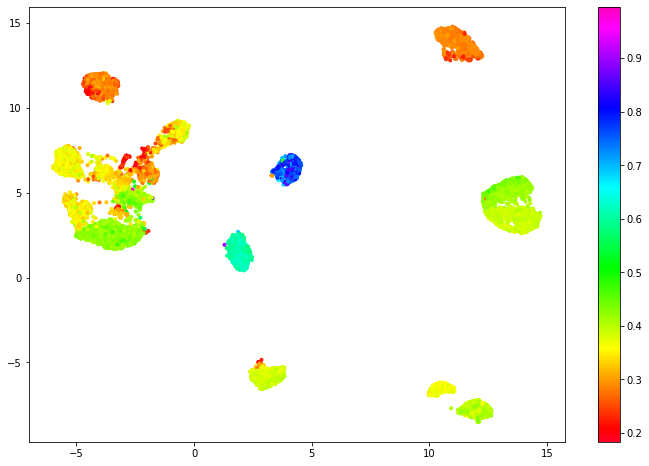

In [79]:
n = 100
colors = lenth[:10000]
colors = colors/6000

fig = plt.figure(figsize=(12,8))
c = plt.scatter(bu[:,0], bu[:,1], c=colors,cmap='gist_rainbow', marker='.')
plt.colorbar(c)